In [1]:
import qiskit
qiskit.__version__

'1.2.1'

In [2]:
# Importing standard Qiskit libralies
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_distribution, plot_histogram
from qiskit_aer import AerSimulator

In [3]:
# 量子回路の初期化
circuit = QuantumCircuit(2)

# 量子回路の組み立て
circuit.h(0) # アダマールゲート行列を適用
circuit.cx(0,1) # CNOTを適用

# 測定
circuit.measure_all()

In [4]:
# 実行と結果取得
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1) # デバイスの状況に合わせて量子回路を最適化
isa_qc = pm.run(circuit)

sampler = Sampler(backend) # 量子プログラムを実行
job = sampler.run([isa_qc]) 
result = job.result()

counts = result[0].data.meas.get_counts() # 結果を取得
print(counts) # 結果をテキスト表示

{'11': 512, '00': 512}


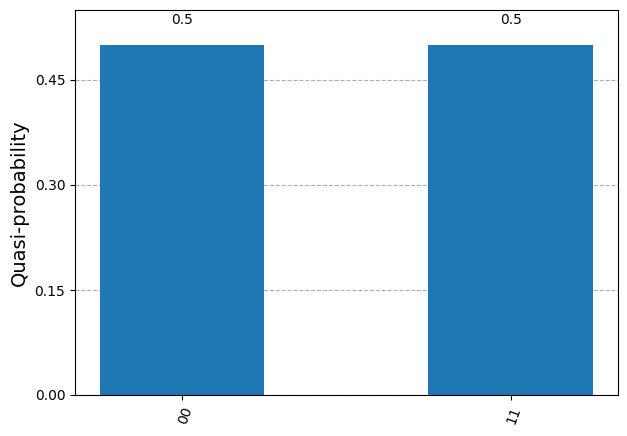

In [5]:
# 確率分布を表示   
plot_distribution(counts)

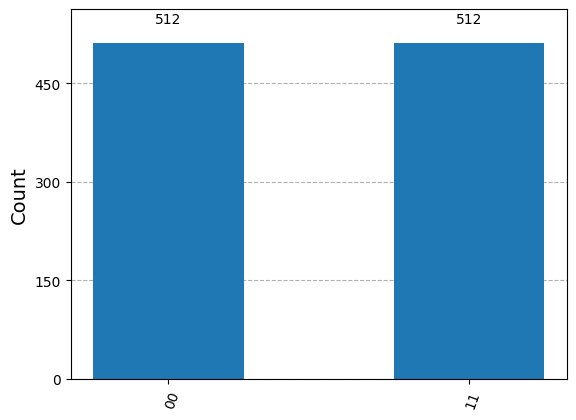

In [6]:
# ヒストグラムを表示   
plot_histogram(counts)

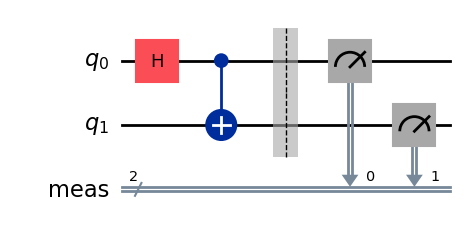

In [7]:
# 量子回路を描画 mpl
circuit.draw(output="mpl")

In [8]:
# 量子回路を描画 text
circuit.draw(output="text")

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [9]:
# 量子回路を描画 latex
print(circuit)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
